In [1]:
#imports
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
#innitiate coded tsv files
# Define the list of desired numbers
use_all_numbers = True
desired_numbers = [2, 3, 4, 10, 11, 16, 17, 18]

# Get a list of all .tsv files in the data folder
tsv_files = glob.glob('data/*.tsv')
# Filter files based on the flag
if use_all_numbers:
    filtered_files = tsv_files
else:
    filtered_files = [file for file in tsv_files if any(f'play{num}coded.tsv' in file for num in desired_numbers)]


# Read each file into a DataFrame and store in a list
dataframes = [pd.read_csv(file, delimiter='\t') for file in filtered_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

In [3]:
# Preprocess data
# Drop labels
X = all_data.drop(columns=['Score'])

# Drop other values
X = X.drop(columns=['SequenceID', 'TimeStamp', 'First30SecondsCoinsCollected', 'First30SecondsAsteroidHits'])

# Separate target variable
y = all_data['Score']
X = X.fillna(method='ffill')



C:\Users\svanl\AppData\Local\Temp\ipykernel_16500\3784440122.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


In [4]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
# Create a pipeline with StandardScaler and SVR with RBF kernel
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)


Mean Squared Error (SVR): 380.152
Mean Absolute Error (SVR): 10.626
R² Score (SVR): 0.100


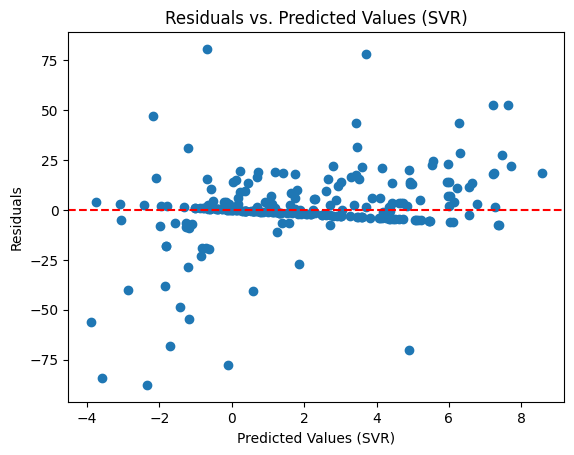

In [7]:
# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics
print(f'Mean Squared Error (SVR): {mse_svr:.3f}')
print(f'Mean Absolute Error (SVR): {mae_svr:.3f}')
print(f'R² Score (SVR): {r2_svr:.3f}')

# Calculate residuals
residuals_svr = y_test - y_pred_svr

# Plot residuals vs predicted values
plt.scatter(y_pred_svr, residuals_svr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (SVR)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (SVR)')
plt.show()
